# K Means

## Variables

* **Private** Un factor con niveles No y Sí indicando universidad privada o pública
* **Apps** Número de solicitudes recibidas
* **Accept** Número de solicitudes aceptadas
* **Enroll** Número de nuevos estudiantes inscritos
* **Top10perc** Pct. nuevos estudiantes del 10% superior de H.S. clase
* **Top25perc** Pct. nuevos estudiantes del 25% superior de H.S. clase
* **FUndergrad** Número de estudiantes universitarios a tiempo completo
* **PUndergrad** Número de estudiantes universitarios a tiempo parcial
* **Outstate** Matrícula fuera del estado
* **RoomBoard**  Costos de alojamiento y comida
* **Books** Costos estimados de libros
* **Personal** Gasto personal estimado
* **PhD** Pct. de profesores con doctorados
* **Terminal** Pct. de profesores con grado terminal
* **SFRatio** Proporción estudiante / facultad
* **percalumni** Pct. ex alumnos que donan
* **Expend** Gastos de instrucción por estudiante
* **GradRate** Tasa de graduación

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('College_Data.csv')

In [ ]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [ ]:
df.describe([i/100 for i in range(5, 100, 5)])

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
5%,329.800000,272.400000,118.600000,7.000000,25.800000,509.800000,20.000000,4601.600000,2735.800000,350.000000,500.000000,43.800000,52.800000,8.300000,6.000000,4795.800000,37.00000
10%,457.600000,361.600000,154.000000,10.000000,30.600000,641.000000,35.000000,5568.800000,3051.200000,400.000000,600.000000,50.600000,59.000000,9.900000,8.000000,5558.200000,44.60000
15%,548.400000,425.600000,183.400000,12.000000,35.000000,740.000000,49.400000,6398.800000,3260.800000,400.000000,730.000000,56.000000,63.000000,10.540000,10.000000,6089.600000,48.00000
20%,632.200000,514.000000,213.200000,14.000000,37.000000,882.200000,71.200000,6806.000000,3412.800000,450.000000,800.000000,59.000000,67.000000,11.100000,11.000000,6433.000000,51.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
30%,877.600000,699.400000,278.800000,17.000000,44.000000,1087.400000,128.800000,7848.800000,3689.800000,500.000000,938.000000,65.000000,74.000000,12.000000,15.000000,7078.000000,56.00000


## EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


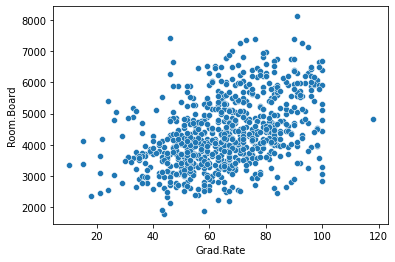

In [ ]:
sns.scatterplot(df['Grad.Rate'], df['Room.Board'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


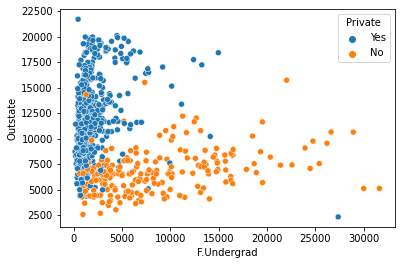

In [ ]:
sns.scatterplot(df['F.Undergrad'], df['Outstate'], hue=df['Private'])

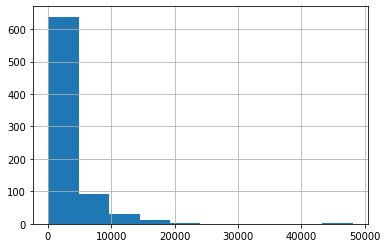

In [ ]:
df['Apps'].hist()

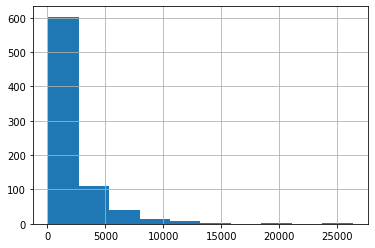

In [ ]:
df['Accept'].hist()

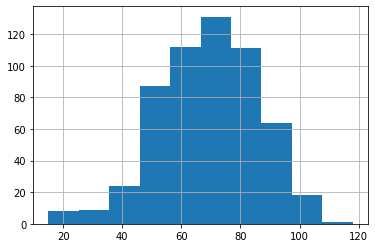

In [ ]:
df[df['Private']=='Yes']['Grad.Rate'].hist()

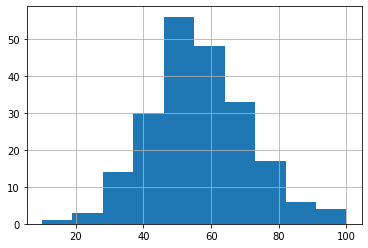

In [ ]:
df[df['Private']=='No']['Grad.Rate'].hist()

## **Tratamiento de outliers**
#### El método elegido fue el del IQR de la manera tradicional.

In [ ]:
q1=df['Grad.Rate'].quantile(.25)
q3=df['Grad.Rate'].quantile(.75)
iqr=q3-q1
print(q1, q3, iqr)

53.0 78.0 25.0


In [ ]:
df2=df[~((df['Grad.Rate']<q1-1.5*iqr)|(df['Grad.Rate']>q3+1.5*iqr))]

In [ ]:
df2.shape

(773, 19)

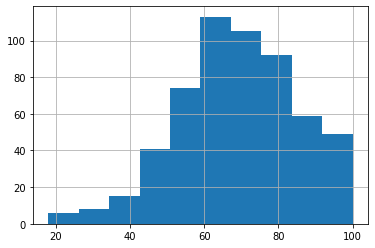

In [ ]:
df2[df2['Private']=='Yes']['Grad.Rate'].hist()

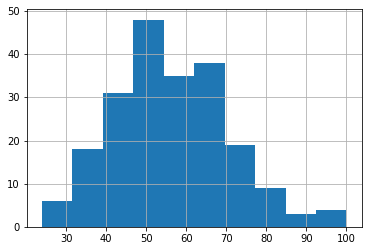

In [ ]:
df2[df2['Private']=='No']['Grad.Rate'].hist()

## K Means Cluster

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=2)

In [ ]:
cols=[col for col in df2.columns if col not in ['Private', 'Unnamed: 0']]
cols

['Apps',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F.Undergrad',
 'P.Undergrad',
 'Outstate',
 'Room.Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S.F.Ratio',
 'perc.alumni',
 'Expend',
 'Grad.Rate']

In [ ]:
Xs = df2[cols]
Xs.head(1)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60


In [ ]:
model.fit(Xs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
model.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81113684e+03, 1.28431128e+03, 4.89052632e+02, 2.53864662e+01,
        5.35097744e+01, 2.19094737e+03, 5.93022556e+02, 1.04082511e+04,
        4.31370075e+03, 5.41482707e+02, 1.27802556e+03, 7.05578947e+01,
        7.79263158e+01, 1.41010526e+01, 2.32436090e+01, 8.93432481e+03,
        6.52736842e+01]])

## Comparación de los clusters con KMeans y la variable Private

In [ ]:
df2["Cluster"]=model.fit_predict(Xs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,0


#### La distribución de frecuencias entre las distribuciones de las variables luce similar. Sin embargo, los diagramas de dispersión muestran que el algoritmo de KMeans hizo dos clusters que son muy distintos a las agrupaciones que se realizan a partir de las etiquetas de la variable Private.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


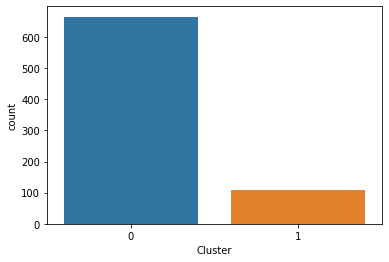

In [ ]:
sns.countplot(df2['Cluster'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


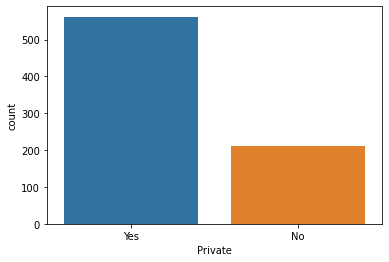

In [ ]:
sns.countplot(df2['Private'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


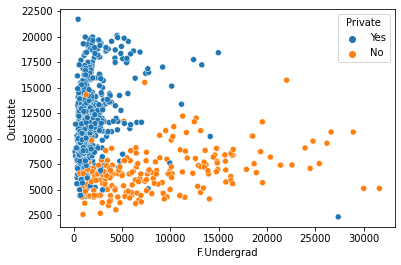

In [ ]:
sns.scatterplot(df2['F.Undergrad'], df2['Outstate'], hue=df2['Private'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


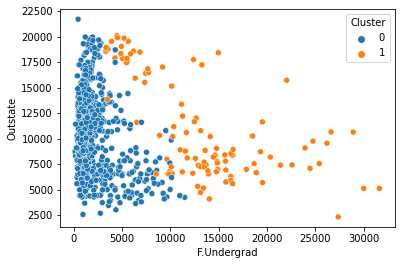

In [ ]:
sns.scatterplot(df2['F.Undergrad'], df2['Outstate'], hue=df2['Cluster'])